# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
from random import uniform
from datetime import datetime
import timer

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_zone = (-90, 90)
lng_zone = (-180, 180)

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

## Generate Cities List

In [4]:

# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()


index      629
City       629
Country    629
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#units =  "metric"



In [6]:
row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1
     
    # put a sleep so we do not exhaust the api call limits
    timer.sleep(1)

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Anadyr RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=anadyr


C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\LAXMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a futur

------------------------
Proceesing: City #  2  |  Leningradskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=leningradskiy
City not found, skipping...
------------------------
Proceesing: City #  3  |  Lompoc US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=lompoc
------------------------
Proceesing: City #  4  |  Bambous Virieux MU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=bambous+virieux
------------------------
Proceesing: City #  5  |  Mataura NZ
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=mataura
City not found, skipping...
------------------------
Proceesing: City #  6  |  Georgetown GY
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=georgetown
------------------------
Proceesing: City #  7 

------------------------
Proceesing: City #  48  |  Suwannaphum TH
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=suwannaphum
------------------------
Proceesing: City #  49  |  Avarua CK
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=avarua
------------------------
Proceesing: City #  50  |  Chuy UY
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=chuy
------------------------
Proceesing: City #  51  |  Victoria BN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=victoria
------------------------
Proceesing: City #  52  |  Leh IN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=leh
City not found, skipping...
------------------------
Proceesing: City #  53  |  Panguna PG
http://api.openweathermap.org/data/2.5/weathe

------------------------
Proceesing: City #  95  |  Lubon PH
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=lubon
------------------------
Proceesing: City #  96  |  Weihai CN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=weihai
------------------------
Proceesing: City #  97  |  Berdigestyakh RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=berdigestyakh
------------------------
Proceesing: City #  98  |  Qaanaaq GL
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=qaanaaq
------------------------
Proceesing: City #  99  |  Mangrol IN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=mangrol
------------------------
Proceesing: City #  100  |  Owensboro US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e

------------------------
Proceesing: City #  142  |  San Cristobal EC
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=san+cristobal
------------------------
Proceesing: City #  143  |  Majene ID
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=majene
------------------------
Proceesing: City #  144  |  Mackay CA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=mackay
------------------------
Proceesing: City #  145  |  Rio Grande BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=rio+grande
------------------------
Proceesing: City #  146  |  Yeppoon AU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=yeppoon
City not found, skipping...
------------------------
Proceesing: City #  147  |  Faanui PF
http://api.openweath

------------------------
Proceesing: City #  188  |  Touho NC
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=touho
------------------------
Proceesing: City #  189  |  Novyy Svit UA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=novyy+svit
------------------------
Proceesing: City #  190  |  Orange Cove US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=orange+cove
------------------------
Proceesing: City #  191  |  San Quintin PH
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=san+quintin
------------------------
Proceesing: City #  192  |  Muzhi RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=muzhi
------------------------
Proceesing: City #  193  |  Vienna AT
http://api.openweathermap.org/data/2.5/weather?a

------------------------
Proceesing: City #  234  |  High Rock BS
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=high+rock
------------------------
Proceesing: City #  235  |  Kavieng PG
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=kavieng
------------------------
Proceesing: City #  236  |  Puerto Escondido MX
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=puerto+escondido
------------------------
Proceesing: City #  237  |  Martapura ID
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=martapura
------------------------
Proceesing: City #  238  |  Honningsvag NO
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=honningsvag
------------------------
Proceesing: City #  239  |  Hami CN
http://api.openweathermap.org/

------------------------
Proceesing: City #  280  |  Porto Murtinho BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=porto+murtinho
------------------------
Proceesing: City #  281  |  Pirogovo RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=pirogovo
------------------------
Proceesing: City #  282  |  Shimoda JP
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=shimoda
------------------------
Proceesing: City #  283  |  Cabedelo BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=cabedelo
------------------------
Proceesing: City #  284  |  Constitucion MX
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=constitucion
City not found, skipping...
------------------------
Proceesing: City #  285  |  Prieska ZA
http:

------------------------
Proceesing: City #  326  |  Gorom-Gorom BF
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=gorom-gorom
------------------------
Proceesing: City #  327  |  Minchinabad PK
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=minchinabad
------------------------
Proceesing: City #  328  |  Nchelenge ZM
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=nchelenge
------------------------
Proceesing: City #  329  |  Port Blair IN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=port+blair
------------------------
Proceesing: City #  330  |  Zarubino RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=zarubino
------------------------
Proceesing: City #  331  |  Ubinskoye RU
http://api.openweathermap.org/d

------------------------
Proceesing: City #  372  |  Peniche PT
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=peniche
------------------------
Proceesing: City #  373  |  Walvis Bay NA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=walvis+bay
------------------------
Proceesing: City #  374  |  Ler NO
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=ler
City not found, skipping...
------------------------
Proceesing: City #  375  |  Graaff-Reinet ZA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=graaff-reinet
------------------------
Proceesing: City #  376  |  Castro CL
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=castro
------------------------
Proceesing: City #  377  |  La Ronge CA
http://api.openweatherma

------------------------
Proceesing: City #  419  |  Banda Aceh ID
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=banda+aceh
------------------------
Proceesing: City #  420  |  Ellisras ZA
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=ellisras
------------------------
Proceesing: City #  421  |  Voineasa RO
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=voineasa
City not found, skipping...
------------------------
Proceesing: City #  422  |  Jabinyanah TN
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=jabinyanah
------------------------
Proceesing: City #  423  |  Porto da Folha BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=porto+da+folha
------------------------
Proceesing: City #  424  |  The Pas CA
htt

------------------------
Proceesing: City #  466  |  Le Port FR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=le+port
------------------------
Proceesing: City #  467  |  Vao EE
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=vao
------------------------
Proceesing: City #  468  |  Santa Rosa AR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=santa+rosa
------------------------
Proceesing: City #  469  |  Hervey Bay AU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=hervey+bay
------------------------
Proceesing: City #  470  |  Niquelandia BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=niquelandia
------------------------
Proceesing: City #  471  |  Bolshoye Murashkino RU
http://api.openweathermap.org/data/2.

------------------------
Proceesing: City #  512  |  Harrison US
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=harrison
------------------------
Proceesing: City #  513  |  Aksehir TR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=aksehir
City not found, skipping...
------------------------
Proceesing: City #  514  |  La Reforma GT
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=la+reforma
------------------------
Proceesing: City #  515  |  Axim GH
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=axim
------------------------
Proceesing: City #  516  |  Skibbereen IE
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=skibbereen
------------------------
Proceesing: City #  517  |  Cache Creek CA
http://api.openweathe

------------------------
Proceesing: City #  559  |  Tornio FI
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=tornio
------------------------
Proceesing: City #  560  |  Kamenka RU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=kamenka
------------------------
Proceesing: City #  561  |  Katherine AU
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=katherine
------------------------
Proceesing: City #  562  |  Pio XII BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=pio+xii
------------------------
Proceesing: City #  563  |  Bom Jesus BR
http://api.openweathermap.org/data/2.5/weather?appid=48d1e39ac06f730b05550a70b0db0a95&units=IMPERIAL&q=bom+jesus
City not found, skipping...


In [7]:
clean_cities_df.count()

City                563
Country             563
Temperature (F)     563
Latitude            563
Longitude           563
Humidity (%)        563
Cloudiness (%)      563
Wind Speed (mph)    563
dtype: int64

In [8]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Anadyr,RU,26.6,64.73,177.51,92,20,11.18
1,Leningradskiy,RU,35.23,69.38,178.42,96,76,15.57
2,Lompoc,US,73.99,34.64,-120.46,53,20,9.17
3,Bambous Virieux,MU,69.8,-20.34,57.76,83,20,1.12
4,Mataura,NZ,46.39,-46.19,168.86,83,56,7.96
5,Georgetown,GY,91.4,6.8,-58.16,55,20,13.87
6,Hermanus,ZA,68.17,-34.42,19.24,47,12,6.96
7,Padang,ID,78.43,-0.92,100.36,100,48,6.73
8,Ponta do Sol,BR,85.63,-20.63,-46,42,24,7.18
9,Bredasdorp,ZA,64.4,-34.53,20.04,77,56,21.92


In [11]:
# Save data to a CSV file
clean_cities_df.to_csv("WeatherPy_analysis/City_data.csv")
#clean_cities_df.to_csv("output_data/cities.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

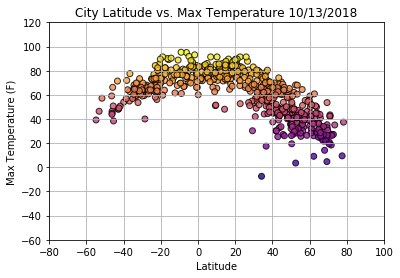

In [14]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

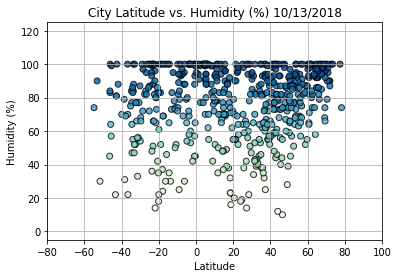

In [16]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

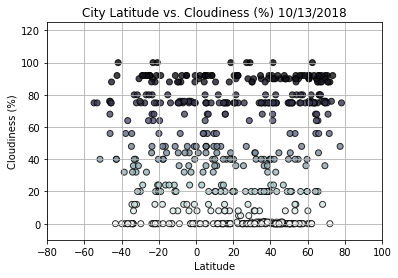

In [18]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

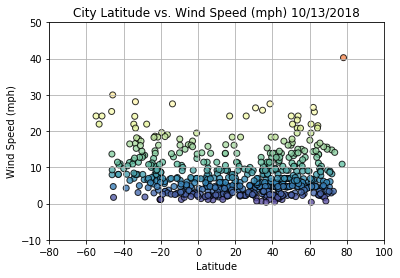

In [19]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
#plt.style.use('matplotlib')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()